In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# fix the name of the categorical columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges.isnull().sum()

11

In [11]:
df.totalcharges = df.totalcharges.fillna(0)
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [12]:
df.churn = (df.churn == 'yes').astype("int8")

## 3.3 Setting up the validation enviroment

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4  EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [18]:
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [21]:
df_full_train.churn.mean()

0.26996805111821087

In [22]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [23]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [24]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
- Churn rate
- Risk ratio
- Mutual information - later

In [25]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [26]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [27]:
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()
churn_male

0.2632135306553911

In [28]:
global_churn = df_full_train.churn.mean()
global_churn


0.26996805111821087

```sql
SELECT 
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM 
    data
GROUP BY
    gender;
```

In [29]:
from IPython.display import display

In [30]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean']/global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [31]:
from sklearn.metrics import mutual_info_score

In [32]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [33]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [34]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [35]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [36]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [37]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

## One-Hot encoding

In [38]:
from sklearn.feature_extraction import DictVectorizer

In [39]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [40]:
dv = DictVectorizer(sparse=False)

In [41]:
X_train = dv.fit_transform(train_dicts)

In [42]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Logistic Regression

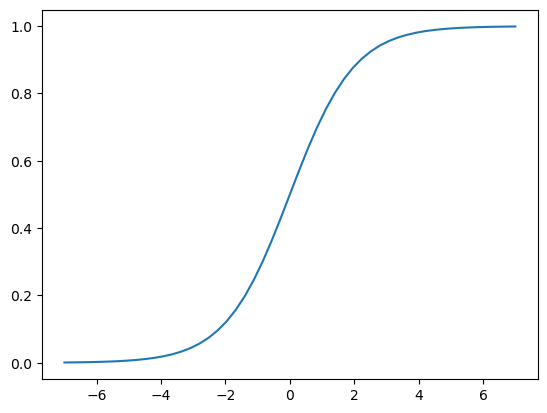

In [43]:
def sigmoid(z):
	return 1/(1+np.exp(-z))

z = np.linspace(-7, 7, 51)

plt.plot(z, sigmoid(z))

def logistic_regression(xi):
	score = w0
	for j in range(len(w)):
		score = score + x[j] * w[j]
	result = sigmoid(score)
	return result

## Training logistic regression with Sckit-Learn

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
model.coef_[0]

array([ 4.74688784e-01, -1.74862507e-01, -4.07513076e-01, -2.96894241e-02,
       -7.79973740e-02,  6.26881250e-02, -8.89874535e-02, -8.13874695e-02,
       -3.43142104e-02, -7.33725876e-02, -3.35184925e-01,  3.16485580e-01,
       -8.89874535e-02,  3.67559907e-03, -2.58142286e-01,  1.41430736e-01,
        9.02475133e-03,  6.25341797e-02, -8.89874535e-02, -8.12335242e-02,
        2.65577312e-01, -8.89874535e-02, -2.84276657e-01, -2.31209729e-01,
        1.23522931e-01, -1.66020524e-01,  5.83337262e-02, -8.70042531e-02,
       -3.20580375e-02,  7.04912427e-02, -5.91157501e-02,  1.41430736e-01,
       -2.49117534e-01,  2.15461693e-01, -1.20349457e-01, -8.89874535e-02,
        1.01650112e-01, -7.08825817e-02, -8.89874535e-02,  5.21832371e-02,
        2.13377775e-01, -8.89874535e-02, -2.32077119e-01, -7.04031883e-02,
        3.82331166e-04])

In [47]:
# hard predictions
#model.predict(X_train)
# soft predictions
y_pred = model.predict_proba(X_val)[:,1]

In [48]:
churn_decision = (y_pred >= 0.5)

In [49]:
(y_val == churn_decision.astype(int)).mean()

0.8034066713981547

In [50]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

## Model Interpretation

In [51]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [52]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [53]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [54]:
model_small.intercept_[0]

-0.05356585031320426

In [55]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.495,
 'contract=one_year': -0.197,
 'contract=two_year': -0.351,
 'tenure': -0.116,
 'totalcharges': 0.001}

In [56]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [57]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [58]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [59]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.0463252263950481

In [60]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [61]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [62]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8076580847712505

In [63]:
len(y_val)

1409

In [64]:
(y_val==churn_decision).mean()

0.8034066713981547

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [67]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


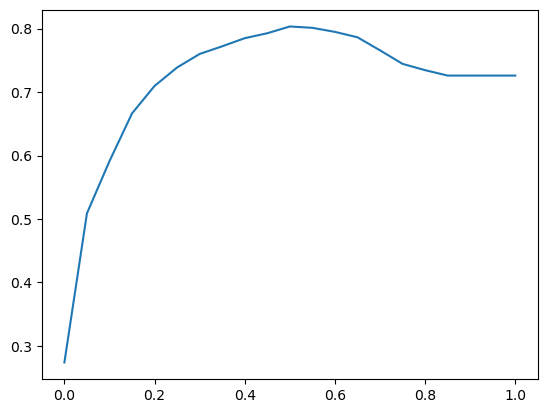

In [68]:
plt.plot(thresholds, scores)

Our model is 80.3 while always predicting the non-churning is 73%

This happens because the dataset is imbalance, and we have more customer non-churning than churning

## Confusion matrix

In [69]:
actual_positive = (y_val==1)
actual_negative = (y_val==0)

In [70]:
t = 0.5
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)

In [71]:
tp = (predicted_positive & actual_positive).sum()
tn = (predicted_negative & actual_negative).sum()

In [72]:
fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()

|| Negative|Positive |
|-- | --|--|
|**Negative**|tn | fp|
|**Positive**| fn| tp|


In [73]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [74]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

Accuracy is the sum of true negative + true positive. In this case:

 $0.65+0.15 = 0.8$

## 4.4 Precision and recall

Precision: Fraction of positive predictions that are correct

From those that we predict to be true how many of them are actually true
Recall: Fraction of correctly identify positive examples

In [75]:
p = tp/ (tp+fp)
p

0.6752411575562701

## 4.5 FPR & TPR

$$ FPR = {FP\over {TN + FP}} $$

$$ TPR = {TP\over {FN + TP}} $$

We want to minimize the FPR and maximize the TPR

In [76]:
tpr = tp/(tp + fn)
tpr

0.5440414507772021

In [77]:
fpr = fp / (fp + tn)
fpr

0.09872922776148582

In [78]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)

    tp = (predicted_positive & actual_positive).sum()
    tn = (predicted_negative & actual_negative).sum()

    fp = (predicted_positive & actual_positive).sum()
    fn = (predicted_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [79]:
columns = ["thresholds", "tp", "fp", "fn", "tn"]
df_scores = pd.DataFrame(scores, columns=columns)

In [80]:
df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [81]:
# get from the first to last record on increment of 10
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,386,0,0,1.000000,1.000000
10,0.1,366,366,20,467,0.948187,0.439376
20,0.2,333,333,53,667,0.862694,0.333000
30,0.3,284,284,102,787,0.735751,0.265173
40,0.4,249,249,137,857,0.645078,0.225136
50,0.5,210,210,176,922,0.544041,0.185512
60,0.6,150,150,236,970,0.388601,0.133929
70,0.7,76,76,310,1003,0.196891,0.070436
80,0.8,13,13,373,1022,0.033679,0.012560
90,0.9,0,0,386,1023,0.000000,0.000000


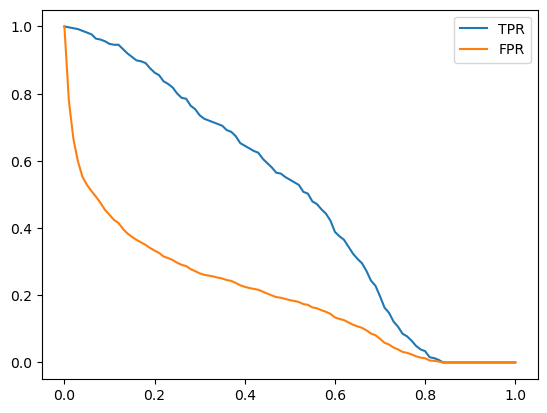

In [101]:
plt.plot(df_scores.thresholds, df_scores["tpr"], label="TPR")
plt.plot(df_scores.thresholds, df_scores["fpr"], label="FPR")
plt.legend()

In [83]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(y_val))
((y_rand >= 0.5)==y_val).mean()

0.5017743080198722

In [84]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

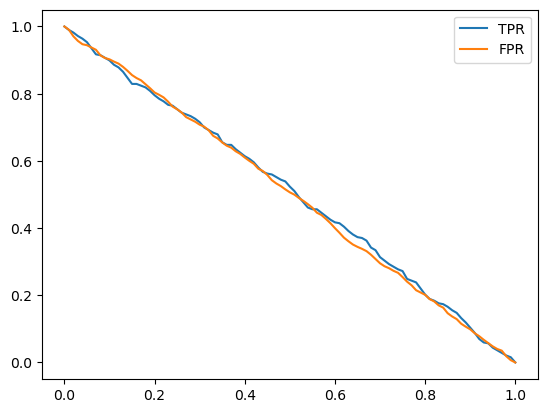

In [85]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

In [86]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


## Ideal model

In [87]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [88]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [90]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [93]:
1 - y_val.mean()

0.7260468417317246

In [94]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [96]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [97]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


In [103]:
df_scores

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.00,386,386,0,0,1.000000,1.000000
1,0.01,385,385,1,110,0.997409,0.777778
2,0.02,384,384,2,193,0.994819,0.665511
3,0.03,383,383,3,257,0.992228,0.598437
4,0.04,381,381,5,308,0.987047,0.552975
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


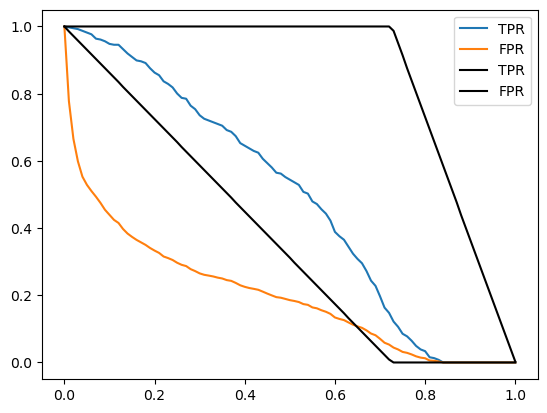

In [106]:
from turtle import color


plt.plot(df_scores.thresholds, df_scores['tpr'], label='TPR')
plt.plot(df_scores.thresholds, df_scores['fpr'], label='FPR')

#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color="black")
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color="black")

plt.legend()

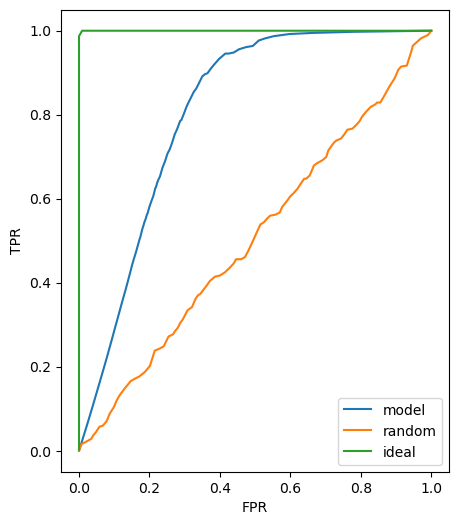

In [110]:
plt.figure(figsize=(5,6))

plt.plot(df_scores.fpr, df_scores.tpr, label="model")
plt.plot(df_rand.fpr, df_rand.tpr, label="random")
plt.plot(df_ideal.fpr, df_ideal.tpr, label="ideal")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
